Joh_Eun_Kang_Math_104C_
Final_Project.



1. True Solution

In [513]:
#soulution
import numpy as np
import math
import matplotlib.pyplot as plt

def ts(x0,xf,t0,tf,lambd,h):
    x = np.linspace(x0,xf,h) # mesh points in time
    #print(len(x))
    u = np.zeros(h)
    #print(len(u))
    for i in range(1,h):
        if abs(2.4 - x[i]) < 0.5: 
            u[i] = math.cos(np.pi*(2.4-x[i]))**2
        else:
            u[i] = 0
        u[:] = u  # u[H] = u[H-1] is not necessary
    plt.plot(x,u,'r') 
    fig= plt.figure(figsize=(3,6))

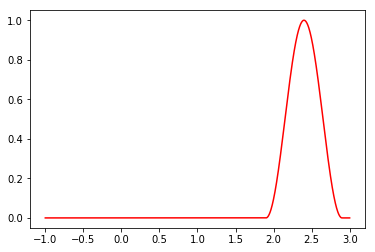

<Figure size 216x432 with 0 Axes>

In [514]:
ts(-1,3,0,2.4,0.8,1000)

1.

In [477]:
import numpy as np
import math
import matplotlib.pyplot as plt

# FTCS
def FTCS(x0,xf,t0,tf,lambd,h):
    H= int((xf-x0)/h)
    x = np.linspace(x0,xf,H+1)# mesh points in space
    dx = h
    
    
    k = lambd*h
    K = int((tf-t0)/k)
    t = np.linspace(0, 1, K+1) # mesh points in time
   
    u   = np.zeros(H+1)# unknown u at new time level
    u_n = np.zeros(H+1)# u at the previous time level       
    
    
    for i in range(0,H+1):
        if abs(x0+i*h) < 0.5: 
            u_n[i] = np.cos(np.pi*x[i])**2
        else:
            u_n[i] = 0

    for n in range(0, K):# Compute u at inner mesh points
        for i in range(1, H):
            u[i] = u_n[i] + (-0.5*lambd)*(u_n[i+1] - u_n[i-1])
        u[H] = u[H-1]
        u_n[:]= u
    plt.plot(x,u,'r') 
    fig= plt.figure(figsize=(3,6))

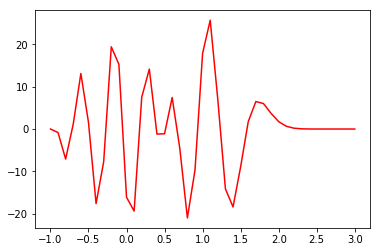

<Figure size 216x432 with 0 Axes>

In [478]:
FTCS(-1,3,0,2.4,0.8,0.1)

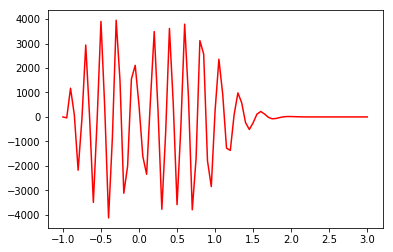

<Figure size 216x432 with 0 Axes>

In [479]:
FTCS(-1,3,0,2.4,0.8,0.05)

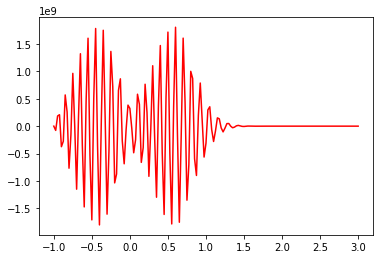

<Figure size 216x432 with 0 Axes>

In [480]:
FTCS(-1,3,0,2.4,0.8,0.025)

In [481]:
#Error for FTCS
import numpy as np
import math
import matplotlib.pyplot as plt

def ErrorFTCS(x0,xf,t0,tf,lambd):
    print('%s' '%9s' % ('h','e_k'))
    h = [0.1,0.05,0.025]
    for j in h:
        H= int((xf-x0)/j)
        x = np.linspace(x0,xf,H+1)# mesh points in space
        dx = j

        k = lambd*j
        K = int((tf-t0)/k)
        t = np.linspace(0, 1, K+1) # mesh points in time
        
        u   = np.zeros(H+1)# unknown u at new time level
        u_n = np.zeros(H+1)# u at the previous time level       
        true= np.zeros(H+1)
    
        for i in range(0,H+1):
            if abs(x0+i*j) < 0.5: 
                u_n[i] = np.cos(np.pi*x[i])**2
            else:
                u_n[i] = 0

        for n in range(0, K):# Compute u at inner mesh points
            for i in range(1, H):
                u[i] = u_n[i] + (-0.5*lambd)*(u_n[i+1] - u_n[i-1])
            u[H] = u[H-1]
            u_n[:]= u
            
        #print(u)

        for i in range(0, H):
            if abs(2.4 - x[i]) < 0.5: 
                true[i] = math.cos(np.pi*(2.4-x[i]))**2
            else:
                true[i] = 0
            true[:] = true
        #print(true)
        
        #print(true - u)
        #for i in range (1, H+1):
        e_k= np.max(abs(true-u))
        #print(e_k)
        print('%s   %s ' %(j,e_k))
        
        

In [482]:
ErrorFTCS(-1,3,0,2.4,0.8)

h      e_k
0.1   25.68390475397556 
0.05   4128.932733824832 
0.025   1801718103.3912969 


In [517]:
import numpy as np
import math
import matplotlib.pyplot as plt

# LF
def LF(x0,xf,t0,tf,lambd,h):
    H= int((xf-x0)/h)
    x = np.linspace(x0,xf,H+1)# mesh points in space
    dx = h
    
    k = lambd*h
    K = int((tf-t0)/k)
    t = np.linspace(0, 1, K+1) # mesh points in time

    u   = np.zeros(H+1)# unknown u at new time level
    u_n = np.zeros(H+1)# u at the previous time level  
    u_n_1 = np.zeros(H+1) # u at n-1 time level
    
    for i in range(1,H+1):# make t_0
        if abs(x[i]) < 0.5: 
            u_n_1[i] = np.cos(x[i]*np.pi)**2
        else:
            u_n_1[i] = 0
    u_n_1[H] = u_n_1[H-1]
    u_n_1[:] = u_n_1 #initial condition
       
    for i in range(1, H):
        u_n[i] = u_n_1[i] + (-0.5*lambd)*(u_n_1[i+1] - u_n_1[i-1])
    u_n[H] = u_n[H-1]
    u_n[:]= u_n
    
    for n in range(0, K):# Compute u at inner mesh points
        for i in range(0, H):
            u[i] = -1*(lambd)*(u_n[i+1] - u_n[i-1]) +u_n_1[i]
        u[H] = u[H-1]
        u_n_1[:] = u_n
        u_n[:] = u
   
       
    plt.plot(x,u,'r') 
    fig= plt.figure(figsize=(3,6))

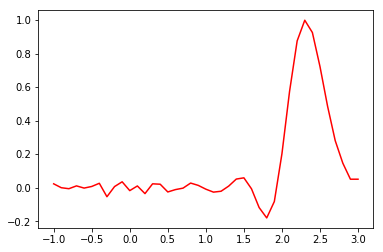

<Figure size 216x432 with 0 Axes>

In [518]:
LF(-1,3,0,2.4,0.8,0.1)

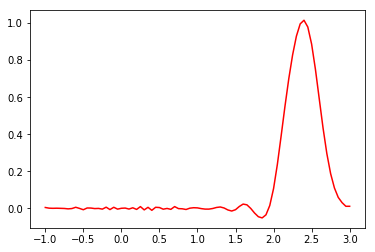

<Figure size 216x432 with 0 Axes>

In [519]:
LF(-1,3,0,2.4,0.8,0.05)

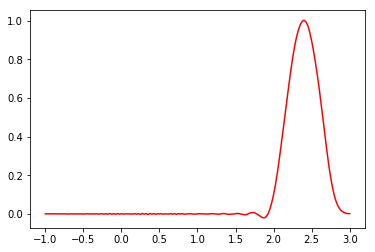

<Figure size 216x432 with 0 Axes>

In [520]:
LF(-1,3,0,2.4,0.8,0.025)

In [523]:
#error LF

import numpy as np
import math
import matplotlib.pyplot as plt

def ErrorLF(x0,xf,t0,tf,lambd):
    print('%s' '%9s' % ('h','e_k'))
    h = [0.1,0.05,0.025]
    for j in h:
        H= int((xf-x0)/j)
        x = np.linspace(x0,xf,H+1)# mesh points in space
        dx = j

        k = lambd*j
        K = int((tf-t0)/k)
        t = np.linspace(0, 1, K+1) # mesh points in time
        
        u   = np.zeros(H+1)# unknown u at new time level
        u_n = np.zeros(H+1)# u at the previous time level  
        u_n_1 = np.zeros(H+1) # u at n-1 time level
        true= np.zeros(H+1) #true 
    
        for i in range(1,H+1):# make t_0
            if abs(x[i]) < 0.5: 
                u_n_1[i] = np.cos(x[i]*np.pi)**2
            else:
                u_n_1[i] = 0
        u_n_1[H] = u_n_1[H-1]
        u_n_1[:] = u_n_1 #initial condition
       
        for i in range(1, H):
            u_n[i] = u_n_1[i] + (-0.5*lambd)*(u_n_1[i+1] - u_n_1[i-1])
        u_n[H] = u_n[H-1]
        u_n[:]= u_n
            
        for n in range(0, K):# Compute u at inner mesh points
            for i in range(1, H):
                u[i] = -1*(lambd)*(u_n[i+1] - u_n[i-1]) +u_n_1[i]
            u[H-1] = u[H]
            u_n_1[:] = u_n
            u_n[:] = u
       
            #print(u)

        for i in range(0, H):
            if abs(2.4 - x[i]) < 0.5: 
                true[i] = math.cos(np.pi*(2.4-x[i]))**2
            else:
                true[i] = 0
            true[:] = true
        #print(true)
        
        #print(true - u)
        #for i in range (1, H+1):
        e_k= np.max(abs(true-u))
        #print(e_k)
        print('%s   %s ' %(j,e_k))
        


In [524]:
ErrorLF(-1,3,0,2.4,0.8)

h      e_k
0.1   0.22843723492082435 
0.05   0.06539833690664143 
0.025   0.02071918304453698 


In [560]:
#upwind Scheme

import numpy as np
import math
import matplotlib.pyplot as plt

def uw(x0,xf,t0,tf,lambd,h):
    H= int((xf-x0)/h)
    x = np.linspace(x0,xf,H+1)# mesh points in space
    dx = h
    
    
    k = lambd*h
    K = int((tf-t0)/k)
    t = np.linspace(0, 1, K+1) # mesh points in time
   
    u   = np.zeros(H+1)# unknown u at new time level
    u_n = np.zeros(H+1)# u at the previous time level       
    
    
    for i in range(1,H+1):
        if abs(x[i]) < 0.5: 
            u_n[i] = np.cos(np.pi*x[i])**2
        else:
            u_n[i] = 0

    for n in range(0, K):# Compute u at inner mesh points
        for i in range(1, H):
            u[i] = u_n[i] + (-1*lambd)*(u_n[i] - u_n[i-1])
        u[0]=0
        u_n[:]= u
        u[H] = u[H-1]
        
    plt.plot(x,u,'r') 
    fig= plt.figure(figsize=(3,6))

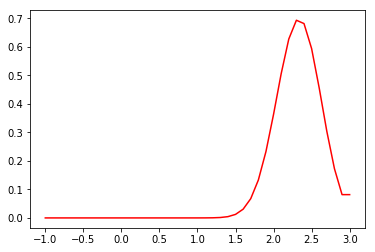

<Figure size 216x432 with 0 Axes>

In [561]:
uw(-1,3,0,2.4,0.8,0.1)

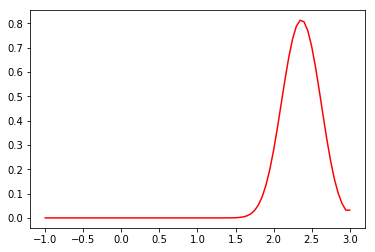

<Figure size 216x432 with 0 Axes>

In [562]:
uw(-1,3,0,2.4,0.8,0.05)

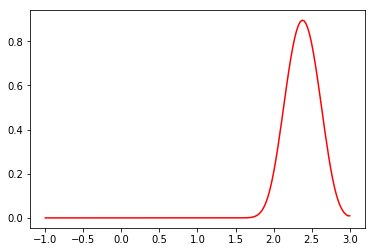

<Figure size 216x432 with 0 Axes>

In [563]:
uw(-1,3,0,2.4,0.8,0.025)

In [542]:
#Error for upwind
import numpy as np
import math
import matplotlib.pyplot as plt

def Erroruw(x0,xf,t0,tf,lambd):
    print('%s' '%9s' % ('h','e_k'))
    h = [0.1,0.05,0.025]
    for j in h:
        H= int((xf-x0)/j)
        x = np.linspace(x0,xf,H+1)# mesh points in space
        dx = j

        k = lambd*j
        K = int((tf-t0)/k)
        t = np.linspace(0, 1, K+1) # mesh points in time
        
        u   = np.zeros(H+1)# unknown u at new time level
        u_n = np.zeros(H+1)# u at the previous time level       
        true= np.zeros(H+1)
    
        for i in range(1,H+1):
            if abs(x[i]) < 0.5: 
                u_n[i] = np.cos(np.pi*x[i])**2
            else:
                u_n[i] = 0

        for n in range(0, K):# Compute u at inner mesh points
            for i in range(1, H):
                u[i] = u_n[i] + (-1*lambd)*(u_n[i] - u_n[i-1])
            u[0]=0
            u[H] = u[H-1]
            u_n[:]= u

        for i in range(0, H):
            if abs(2.4 - x[i]) < 0.5: 
                true[i] = math.cos(np.pi*(2.4-x[i]))**2
            else:
                true[i] = 0
            true[:] = true
        #print(true)
        
        #print(true - u)
        #for i in range (1, H+1):
        e_k= np.max(abs(true-u))
        #print(e_k)
        print('%s   %s ' %(j,e_k))
        


In [543]:
Erroruw(-1,3,0,2.4,0.8)

h      e_k
0.1   0.31876165217118724 
0.05   0.20602679957472858 
0.025   0.11690178498611292 


In [564]:
import numpy as np
import math
import matplotlib.pyplot as plt


def Lax(x0,xf,t0,tf,lambd,h):
    H= int((xf-x0)/h)
    x = np.linspace(x0,xf,H+1)# mesh points in space
    #print(x)
    dx = h
    
    k = lambd*h
    K = int((tf-t0)/k)
    #print(K)
    t = np.linspace(0, 1, K+1) # mesh points in time
   
    u   = np.zeros(H+1)# unknown u at new time level
    u_n = np.zeros(H+1)# u at the previous time level       
    
    
    for i in range(1,H+1):
        if abs(x[i]) < 0.5: 
            u_n[i] = np.cos(np.pi*x[i])**2
        else:
            u_n[i] = 0    
            
    for n in range(0, K):# Compute u at inner mesh points
        for i in range(1, H):
            u[i] = 0.5*(u_n[i+1] + u_n[i-1]) + (-0.5*lambd)*(u_n[i+1] - u_n[i-1])
        u[0] = 0
        u[H] = u[H-1]
        u_n[:]= u
    
    
    plt.plot(x,u,'r') 
    fig= plt.figure(figsize=(3,6))

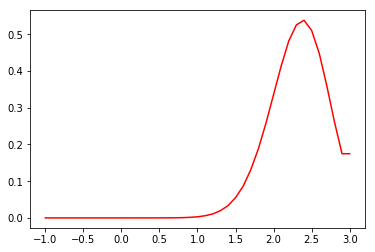

<Figure size 216x432 with 0 Axes>

In [565]:
Lax(-1,3,0,2.4,0.8,0.1)

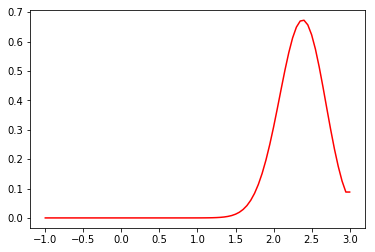

<Figure size 216x432 with 0 Axes>

In [566]:
Lax(-1,3,0,2.4,0.8,0.05)

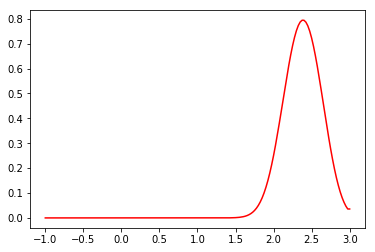

<Figure size 216x432 with 0 Axes>

In [567]:
Lax(-1,3,0,2.4,0.8,0.025)

In [568]:
# Error for Lax
import numpy as np
import math
import matplotlib.pyplot as plt

def Errorlax(x0,xf,t0,tf,lambd):
    print('%s' '%9s' % ('h','e_k'))
    h = [0.1,0.05,0.025]
    for j in h:
        H= int((xf-x0)/j)
        x = np.linspace(x0,xf,H+1)# mesh points in space
        dx = j

        k = lambd*j
        K = int((tf-t0)/k)
        t = np.linspace(0, 1, K+1) # mesh points in time
        
        u   = np.zeros(H+1)# unknown u at new time level
        u_n = np.zeros(H+1)# u at the previous time level       
        true= np.zeros(H+1)
    
        for i in range(0,H+1):
            if abs(x[i]) < 0.5: 
                u_n[i] = np.cos(np.pi*x[i])**2
            else:
                u_n[i] = 0    
            
        for n in range(0, K):# Compute u at inner mesh points
            for i in range(1, H):
                u[i] = 0.5*(u_n[i+1] + u_n[i-1]) + (-0.5*lambd)*(u_n[i+1] - u_n[i-1])
            u[0] = 0
            u_n[:]= u
            u[H] = u[H-1]

        for i in range(0, H):
            if abs(2.4 - x[i]) < 0.5: 
                true[i] = math.cos(np.pi*(2.4-x[i]))**2
            else:
                true[i] = 0
            true[:] = true
        #print(true)
        
        #print(true - u)
        #for i in range (1, H+1):
        e_k= np.max(abs(true-u))
        #print(e_k)
        print('%s   %s ' %(j,e_k))
        

In [569]:
Errorlax(-1,3,0,2.4,0.8)

h      e_k
0.1   0.46156834370666966 
0.05   0.32750430857227053 
0.025   0.20719777118562 


For each scheme determine whether the scheme is a useful or useless scheme. For the purposes
of this question only, a scheme will be useless if Un
j is greater than 5 for any value of m and
n. It will be regarded as a useful scheme if the solution looks like a reasonable approximation
to the solution of the dierential equations. Graph or plot several solutions at the last time
they were computed. What do you notice about the \blow-up time" for the useless schemes
as the mesh size decreases? Is there a pattern to these solutions? For the useful cases, how
does the error decrease as the mesh decreases, i.e., as h decreases by one-half, by how much
does the error decrease?

-> PDF file attached in Gaucho Space

2.

-> PDF file attached in Gaucho Space.